In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import math
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from skimage import io
from skimage import feature

import matplotlib.pyplot as plt

import cv2

In [0]:
#LOAD IMAGE DATASET
recurve = os.listdir('/content/drive/My Drive/dataset/bow/1. traditional Recurve Bow')
longbow = os.listdir('/content/drive/My Drive/dataset/bow/2. Longbow')
compound = os.listdir('/content/drive/My Drive/dataset/bow/3. Compound Bow')
crossbow = os.listdir('/content/drive/My Drive/dataset/bow/4. Crossbow')
kyudo = os.listdir('/content/drive/My Drive/dataset/bow/5. Kyudo Bow')


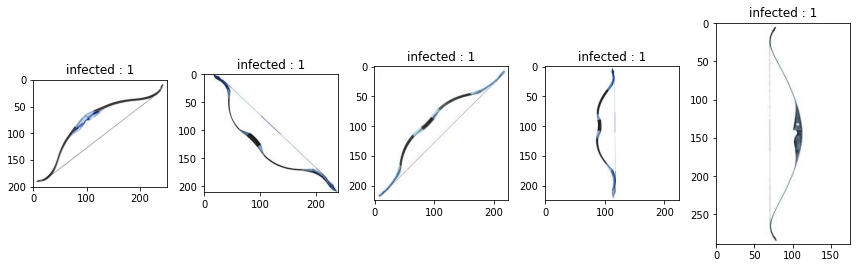

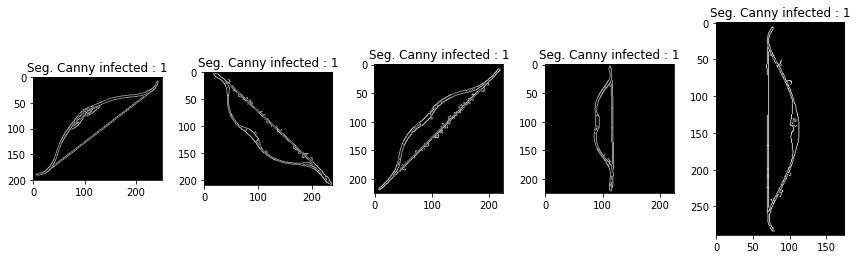

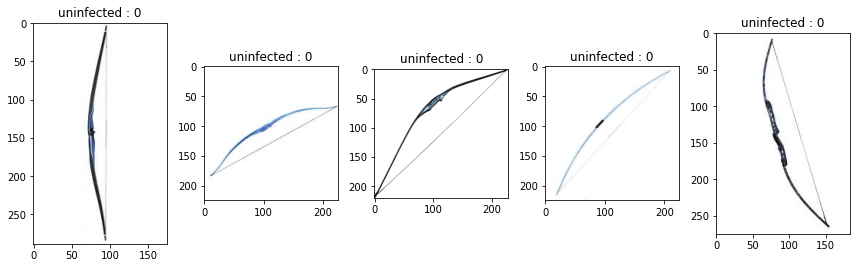

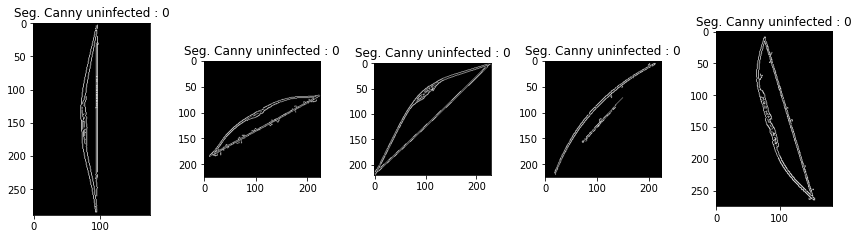

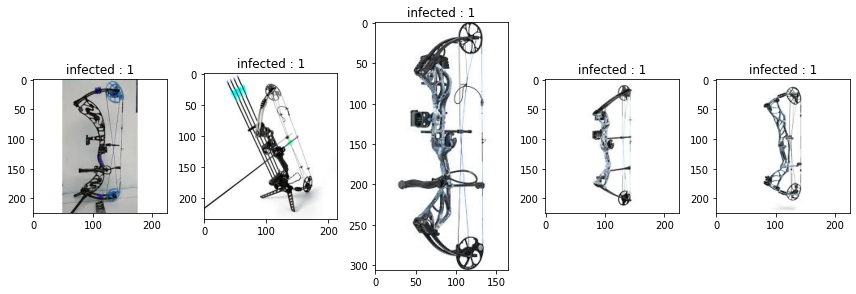

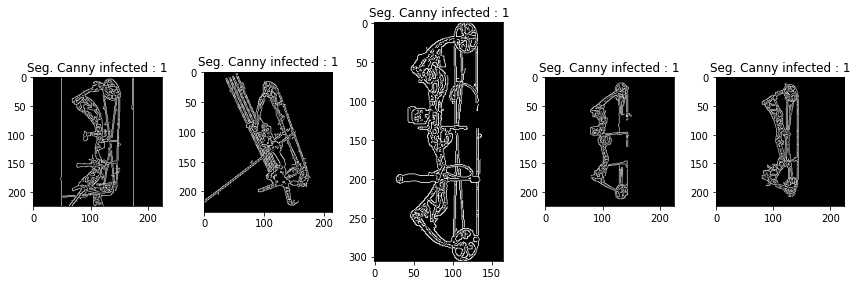

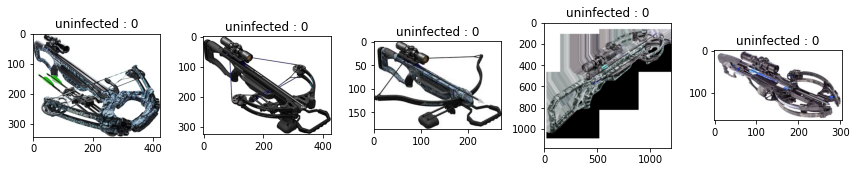

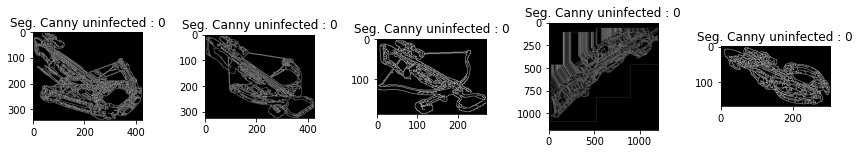

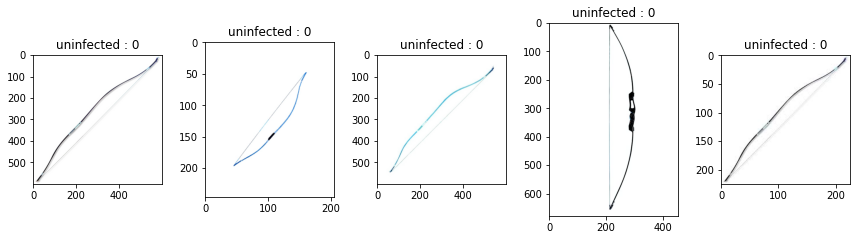

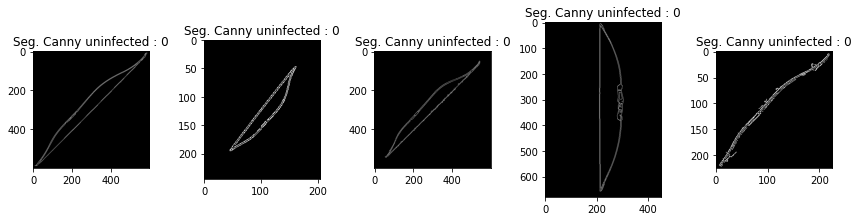

In [9]:
#VISUALISASI
plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/dataset/bow/1. traditional Recurve Bow' + "/" + recurve[i])
    plt.imshow(img,cmap='gray')
    plt.title('infected : 1')
    plt.tight_layout()

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/dataset/bow/1. traditional Recurve Bow' + "/" + recurve[i])
    edges = cv2.Canny(img,25,255,L2gradient=False)
    plt.imshow(edges,cmap='gray')
    plt.title('Seg. Canny infected : 1')
    plt.tight_layout()

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/dataset/bow/2. Longbow' + "/" + longbow[i])
    plt.imshow(img,cmap='gray')
    plt.title('uninfected : 0')
    plt.tight_layout()

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/dataset/bow/2. Longbow' + "/" + longbow[i])
    edges = cv2.Canny(img,25,255,L2gradient=False)
    plt.imshow(edges,cmap='gray')
    plt.title('Seg. Canny uninfected : 0')
    plt.tight_layout()
plt.show()

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/dataset/bow/3. Compound Bow' + "/" + compound[i])
    plt.imshow(img,cmap='gray')
    plt.title('infected : 1')
    plt.tight_layout()

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/dataset/bow/3. Compound Bow' + "/" + compound[i])
    edges = cv2.Canny(img,25,255,L2gradient=False)
    plt.imshow(edges,cmap='gray')
    plt.title('Seg. Canny infected : 1')
    plt.tight_layout()

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/dataset/bow/4. Crossbow' + "/" + crossbow[i])
    plt.imshow(img,cmap='gray')
    plt.title('uninfected : 0')
    plt.tight_layout()

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/dataset/bow/4. Crossbow' + "/" + crossbow[i])
    edges = cv2.Canny(img,25,255,L2gradient=False)
    plt.imshow(edges,cmap='gray')
    plt.title('Seg. Canny uninfected : 0')
    plt.tight_layout()
plt.show()

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/dataset/bow/5. Kyudo Bow' + "/" + kyudo[i])
    plt.imshow(img,cmap='gray')
    plt.title('uninfected : 0')
    plt.tight_layout()

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/dataset/bow/5. Kyudo Bow' + "/" + kyudo[i])
    edges = cv2.Canny(img,25,255,L2gradient=False)
    plt.imshow(edges,cmap='gray')
    plt.title('Seg. Canny uninfected : 0')
    plt.tight_layout()
plt.show()

In [0]:
#SEGMENTASI DAN HUMOMENT
x = np.array([['h1','h2','h3','h4','h5','h6','h7','target']])

for i in range(len(recurve)):
    img = cv2.imread('/content/drive/My Drive/dataset/bow/1. traditional Recurve Bow' + "/" + recurve[i])
    edges = cv2.Canny(img,25,100)
    a = cv2.HuMoments(cv2.moments(edges)).flatten()
    a = np.append(a,'recurve')
    x = np.vstack((x,a))

for i in range(len(longbow)):
    img = cv2.imread('/content/drive/My Drive/dataset/bow/2. Longbow' + "/" + longbow[i])
    edges = cv2.Canny(img,25,100)
    a = cv2.HuMoments(cv2.moments(edges)).flatten()
    a = np.append(a,'longbow')
    x = np.vstack((x,a))

for i in range(len(compound)):
    img = cv2.imread('/content/drive/My Drive/dataset/bow/3. Compound Bow' + "/" + compound[i])
    edges = cv2.Canny(img,25,100)
    a = cv2.HuMoments(cv2.moments(edges)).flatten()
    a = np.append(a,'compound')
    x = np.vstack((x,a))

for i in range(len(crossbow)):
    img = cv2.imread('/content/drive/My Drive/dataset/bow/4. Crossbow' + "/" + crossbow[i])
    edges = cv2.Canny(img,25,100)
    a = cv2.HuMoments(cv2.moments(edges)).flatten()
    a = np.append(a,'crossbow')
    x = np.vstack((x,a))

for i in range(len(kyudo)):
    img = cv2.imread('/content/drive/My Drive/dataset/bow/5. Kyudo Bow' + "/" + kyudo[i])
    edges = cv2.Canny(img,25,100)
    a = cv2.HuMoments(cv2.moments(edges)).flatten()
    a = np.append(a,'kyudo')
    x = np.vstack((x,a))


In [0]:
#EXPORT to CSV
np.savetxt("/content/drive/My Drive/dataset/bow.csv", x, fmt='%s',delimiter=',' )

In [13]:
#LOAD CSV DATASET

dataset = pd.read_csv('/content/drive/My Drive/dataset/bow.csv')
print (len(dataset))
print (dataset)

811
           h1        h2            h3  ...            h6            h7   target
0    0.016872  0.000221  8.821579e-07  ... -8.872862e-10 -3.561813e-14  recurve
1    0.018330  0.000273  4.283593e-07  ... -6.101138e-10  5.281576e-16  recurve
2    0.015463  0.000210  1.953207e-07  ...  6.071076e-11  2.577083e-15  recurve
3    0.015449  0.000205  1.545602e-07  ... -1.915874e-10  2.918674e-16  recurve
4    0.018713  0.000294  4.449955e-07  ... -7.145278e-10  2.043469e-15  recurve
..        ...       ...           ...  ...           ...           ...      ...
806  0.027208  0.000645  1.036554e-06  ... -2.754379e-09  1.170673e-14    kyudo
807  0.071369  0.004918  2.014931e-05  ...  8.574983e-07 -2.003236e-11    kyudo
808  0.083957  0.006593  3.569076e-05  ... -2.162474e-07 -6.895432e-11    kyudo
809  0.092446  0.008086  3.408387e-05  ... -2.674945e-07 -5.201191e-11    kyudo
810  0.000000  0.000000  0.000000e+00  ...  0.000000e+00  0.000000e+00    kyudo

[811 rows x 8 columns]


In [15]:
#split target and attribute
x = dataset.iloc[:,1:7]
y = dataset.iloc[:,7]

#split train n test dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0, test_size=0.1)
print(len(y_test))
print(len(x_train))
print(len(dataset))

82
729
811


Text(0.5, 1.0, 'testing')

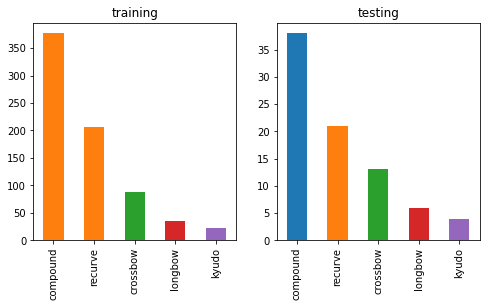

In [20]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1);y_train.value_counts().plot(kind='bar', color=['C1','C1','C2','C3','C4','C5','C6']);plt.title('training')
plt.subplot(1,2,2);y_test.value_counts().plot(kind='bar', color=['C0','C1','C2','C3','C4','C5','C6']);plt.title('testing')

In [21]:
#scaling data
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)
x_train

array([[-0.17405353, -0.09975748, -0.05521344, -0.03713588, -0.03552271,
        -0.00513121],
       [-0.10743642, -0.09695008, -0.05527295, -0.03713592, -0.03559079,
        -0.00512903],
       [ 0.29062544, -0.02510461, -0.04704405, -0.03714539, -0.0378883 ,
        -0.00501295],
       ...,
       [-0.23869751, -0.1032052 , -0.05571069, -0.03713589, -0.03552794,
        -0.00512803],
       [-0.21192445, -0.10031925, -0.05546078, -0.0371359 , -0.03554393,
        -0.00512744],
       [-0.23266156, -0.1022394 , -0.05554833, -0.03713589, -0.0355308 ,
        -0.00512842]])

In [23]:
#choose method and fitting
classifier = KNeighborsClassifier(n_neighbors=10,p=5,metric='euclidean')
classifier.fit (x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=5,
                     weights='uniform')

In [24]:
#testing fsts
y_pred = classifier.predict(x_test)
y_pred

array(['compound', 'recurve', 'recurve', 'compound', 'recurve', 'recurve',
       'compound', 'compound', 'recurve', 'crossbow', 'compound',
       'compound', 'recurve', 'recurve', 'compound', 'compound',
       'compound', 'compound', 'compound', 'compound', 'kyudo',
       'compound', 'compound', 'compound', 'compound', 'compound',
       'compound', 'compound', 'recurve', 'compound', 'recurve',
       'recurve', 'recurve', 'compound', 'compound', 'compound',
       'recurve', 'compound', 'compound', 'compound', 'compound',
       'compound', 'recurve', 'compound', 'compound', 'compound',
       'compound', 'compound', 'recurve', 'recurve', 'compound',
       'longbow', 'compound', 'compound', 'compound', 'compound',
       'compound', 'compound', 'compound', 'compound', 'compound',
       'recurve', 'compound', 'compound', 'compound', 'kyudo', 'crossbow',
       'kyudo', 'recurve', 'compound', 'recurve', 'compound', 'compound',
       'compound', 'compound', 'recurve', 'compound', 

In [25]:
#print result
cm = confusion_matrix(y_test, y_pred)
print (cm)
print("Akurasi :" , accuracy_score(y_test, y_pred))
print("presisi :" , precision_score(y_test, y_pred, average=None))
print("recall :" , recall_score(y_test, y_pred, average=None))
print("F-Measure :" , f1_score(y_test, y_pred, average=None))

[[38  0  0  0  0]
 [11  2  0  0  0]
 [ 0  0  4  0  0]
 [ 1  0  0  1  4]
 [ 6  0  0  0 15]]
Akurasi : 0.7317073170731707
presisi : [0.67857143 1.         1.         1.         0.78947368]
recall : [1.         0.15384615 1.         0.16666667 0.71428571]
F-Measure : [0.80851064 0.26666667 1.         0.28571429 0.75      ]


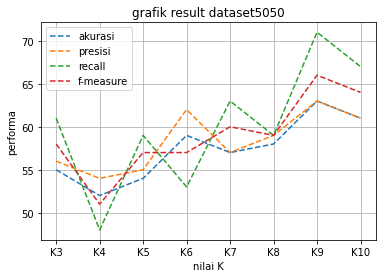

In [26]:
#dataset5050
from matplotlib import pyplot as plt
x = ["K3", "K4", "K5", "K6", "K7", "K8","K9","K10"]
a = [55, 52, 54, 59, 57, 58 , 63 ,61]
p = [56, 54, 55, 62, 57, 59, 63, 61]
r = [61, 48, 59, 53, 63, 59, 71, 67]
f = [58, 51, 57, 57, 60, 59, 66, 64]
plt.plot(x, a, '--')
plt.plot(x, p, '--')
plt.plot(x, r, '--')
plt.plot(x, f, '--')
plt.title("grafik result dataset5050")
plt.xlabel("nilai K")
plt.ylabel("performa")
plt.legend(["akurasi", "presisi", "recall", "f-measure"])
plt.grid()
plt.show()